Algo steps
1. compute neigh
2. compute metrics (dist and angle)
3. pca
4. while criterion not met:
  - scale dimensions not needed
  - compute error on wanted dim and adjust values
 5. discard unwanted to obtain projection

parameters:
- k = num neigh
- lr (or whatever name): the step used to adjust wanted dimensions 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree

In [6]:
def gen_roll(n):
    data = np.zeros((n,4))
    t = np.array([2+8*i/n for i in range(n)])
    data[:,0] = t*np.sin(t)
    data[:,2] = t*np.cos(t)
    data[:,1] = np.random.uniform(-6,6,n)
    data[:,3] = t
    return data

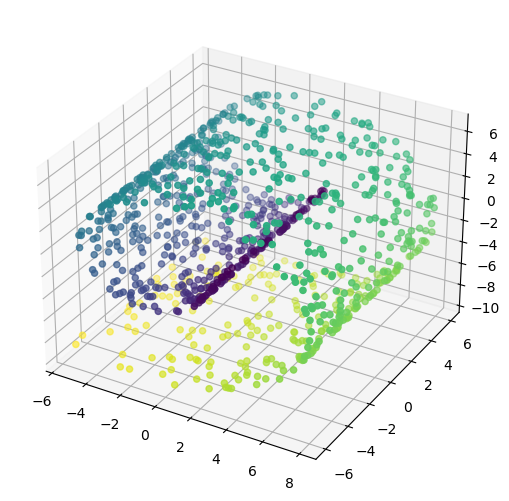

In [15]:
data = gen_roll(1000)
roll = data[:,:3]
phi = data[:,-1]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1],projection='3d')
ax.scatter3D(roll[:,0],roll[:,1],roll[:,2],c=phi)

In [26]:
tree = KDTree(roll)
k = 5
n = 1000
dist, ind = tree.query(roll,k+1)
dist = dist[:,1:]
ind = ind[:,1:]

In [34]:
# it is very possible that this does some random stuff. check at some point
colinearNei = np.zeros((n,k))
theta = np.zeros((n,k))
for point,neighbourhood in enumerate(ind):
    for _it,neighbour in enumerate(neighbourhood): # _it is an iterator over the neigh of i
        da = data[point]-data[neighbour]
        la = da.dot(da)
        cosines = np.zeros(k)
        # _itt is an iterator over the neigh of neighbour
        for _itt,candidate in enumerate(ind[neighbour]): #possibly have problems if the neigh is pt i itself
            db = data[candidate] - data[neighbour]
            lb = db.dot(db)
            cosTheta = np.dot(da,db)/np.sqrt(la*lb)
            cosines[_itt] = cosTheta
        bestidx = np.argmin(cosines)
        colinearNei[point,_it] = ind[neighbour,bestidx]
        theta[point,_it] = cosines[bestidx]


In [37]:
for i,row in enumerate(colinearNei):
    for j in row:
        if i == j:
            print(f'pt {i} has itself has most colinear')
# this should check if any of the points has itself as most colinear point.
# it seems that this is not the case for any point, which is suspicious.